## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=["Date", "Tag", "Posts"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2426, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

Date     2426
Tag      2426
Posts    2426
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [42]:
grouped_df = df.groupby('Tag').sum()
grouped_df = grouped_df.sort_values('Posts', ascending = False)
grouped_df

,Posts
Tag,
javascript,2477923
python,2110033
java,1888656
c#,1582934
php,1455671
c++,789219
r,482600
c,393627
swift,324984


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [7]:
df["Date"] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [9]:
pivoted_df = df.pivot(index='Date', columns='Tag', values='Posts')
pivoted_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,242.0,2006.0,5801.0,3200.0,153.0,738.0,6482.0,14071.0,82.0,3365.0,22051.0,4530.0,436.0,1623.0
2022-11-01,288.0,2186.0,6054.0,3310.0,116.0,751.0,6805.0,14369.0,110.0,3366.0,22918.0,4630.0,466.0,1679.0
2022-12-01,284.0,1868.0,5351.0,2872.0,86.0,634.0,6004.0,12581.0,94.0,2906.0,19378.0,3689.0,397.0,1471.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [10]:
pivoted_df.shape

(176, 14)

In [11]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [12]:
pivoted_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [13]:
pivoted_df = pivoted_df.fillna(0) # TEN SAM EFEKT reshaped_df.fillna(0, inplace=True) 

In [14]:
pivoted_df.isna().values.any() # False = brak NaN

False

In [15]:
pivoted_df.sum()

Tag
assembly        42330.0
c              393627.0
c#            1582934.0
c++            789219.0
delphi          50605.0
go              67841.0
java          1888656.0
javascript    2477923.0
perl            67525.0
php           1455671.0
python        2110033.0
r              482600.0
ruby           227425.0
swift          324984.0
dtype: float64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

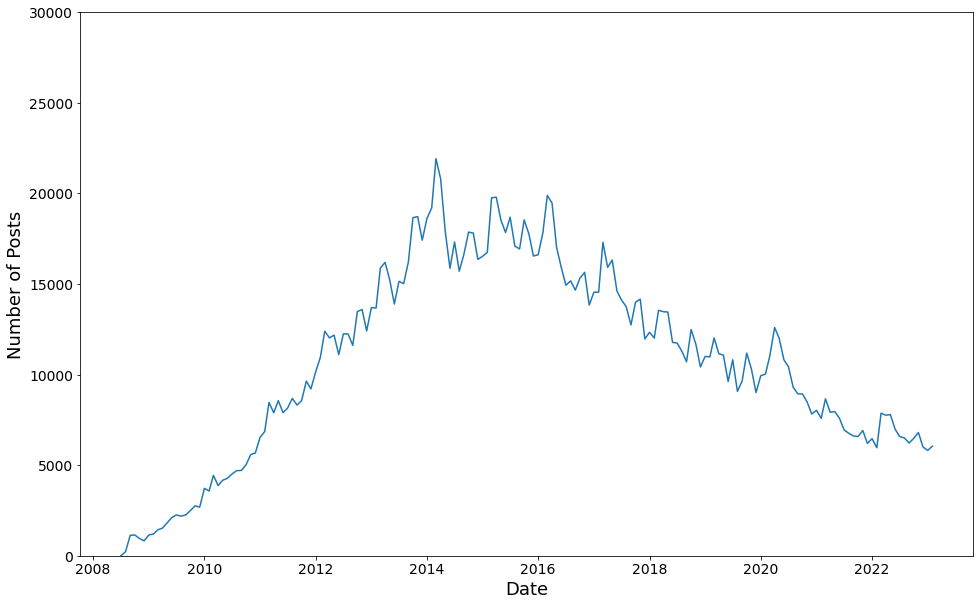

In [32]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)
plt.ylim(0, 30000)
plt.plot(pivoted_df.index, pivoted_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

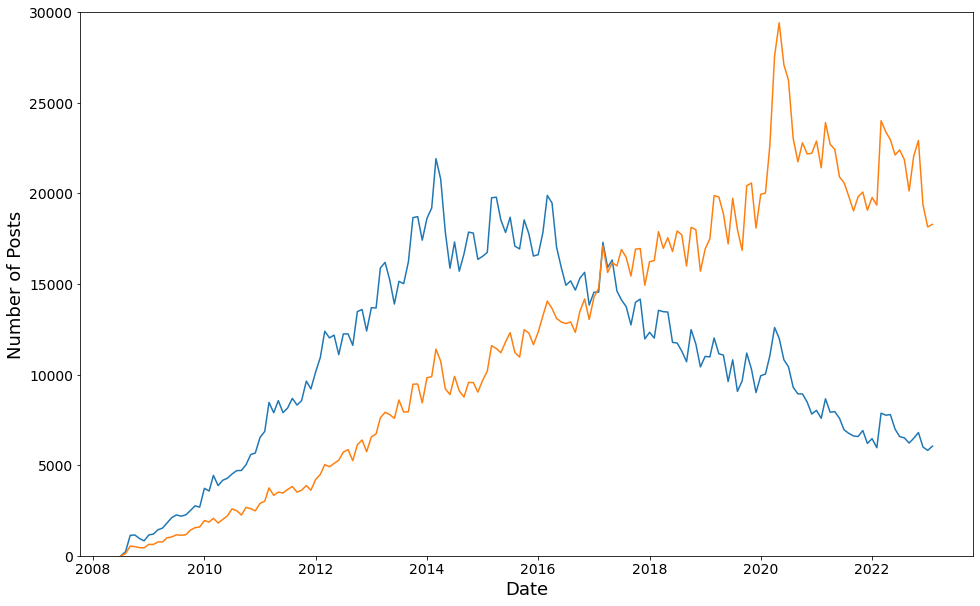

In [33]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)
plt.ylim(0, 30000)
plt.plot(pivoted_df.index, pivoted_df['java'], label='Java')
plt.plot(pivoted_df.index, pivoted_df['python'], label='Python')

##### All langauges on one plot


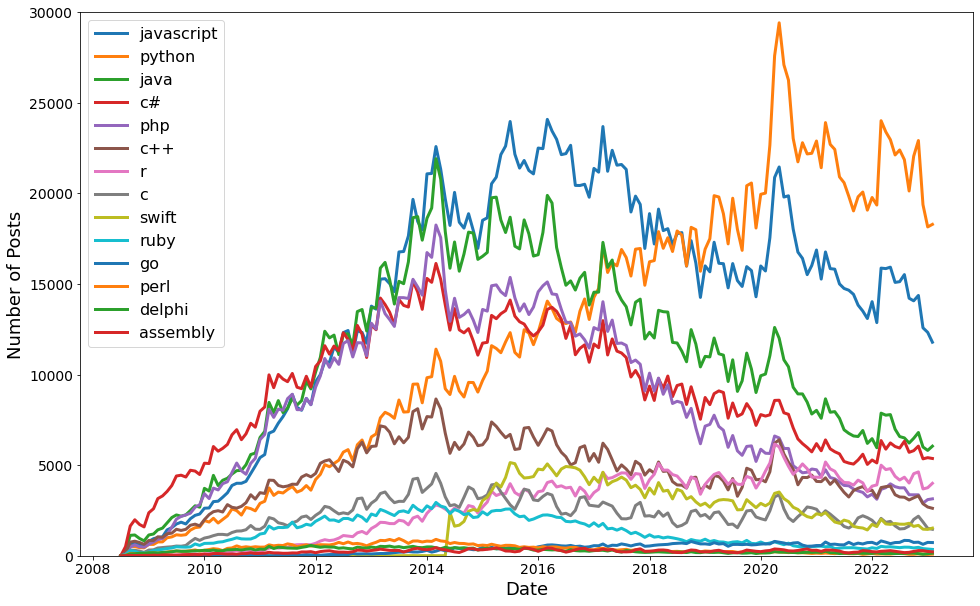

In [58]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)
plt.ylim(0, 30000)
for column in grouped_df.sort_values('Posts', ascending = False).index:
    plt.plot(pivoted_df.index, pivoted_df[str(column)], linewidth=3, label=str(column))
    

plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

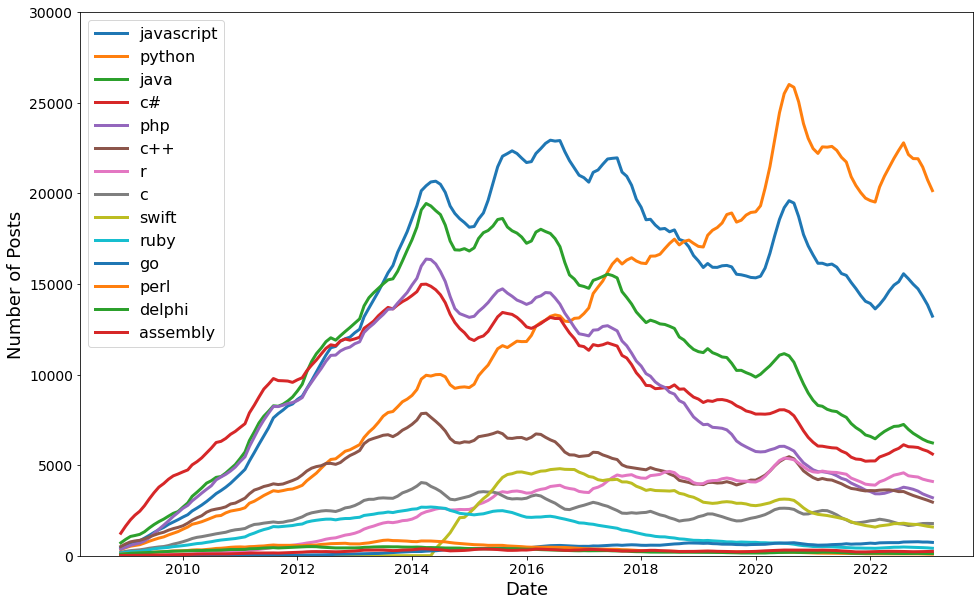

In [65]:
roll_df = pivoted_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)
plt.ylim(0, 30000)
for column in grouped_df.sort_values('Posts', ascending = False).index:
    plt.plot(roll_df.index, roll_df[str(column)], linewidth=3, label=str(column))
    

plt.legend(fontsize=16) 